In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#geant4_name = "improved_200cells_FPCD.hdf5"
#geant4_name = "smeared_200cells_FPCD.hdf5"
#geant4_name = 'improvedMIP_200cells_FPCD.hdf5'
#geant4_name = "smeared_20keV_200cells_FPCD.hdf5"
#geant4_name = "newMIP_smeared_20keV_200cells_FPCD.hdf5"
geant4_name = "G4_Discrete.h5"


#diffusion_name = "GSGM_MaskedMean.h5"
#diffusion_name = "GSGM_spikes.h5"
#diffusion_name = "GSGM_nospikes_300Epochs.h5"
#diffusion_name = "GSGM.h5"
diffusion_name = "GSGM_Discrete.h5"


#diffusion_name = "GSGM_Discrete.h5"
#diffusion_name = "GSGM_norevert.h5"
#diffusion_name = "GSGM_Discrete.h5"

g4 = h5py.File(geant4_name, 'r')
dfsn = h5py.File(diffusion_name,'r')

g4.keys()
#dfsn.keys()

nevts = 10_000

In [3]:
print(np.shape(dfsn['cell_features']))
print(np.shape(g4['hcal_cells']))

(10000, 200, 4)
(1793500, 200, 5)


In [4]:
MASK = g4['hcal_cells'][:nevts,:,-1] == 1
not_MASK = g4['hcal_cells'][:nevts,:,-1] == 0
neg_MASK = g4['hcal_cells'][:nevts,:,-1] == -0

In [5]:
print(g4['hcal_cells'][:nevts,:,-1])

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


In [6]:
MASK = np.ravel(MASK)
not_MASK = np.ravel(not_MASK)
neg_MASK = np.ravel(neg_MASK)

In [7]:
print(MASK[-10:])

[False False False False False False False False False False]


In [8]:
g4_cellsE = np.ravel(g4['hcal_cells'][:nevts,:,0])
dfsn_cellsE = np.ravel(dfsn['cell_features'][:,:,0])

mask = g4_cellsE != 0.0
mask_dfsn = dfsn_cellsE != 0

np.log10(g4_cellsE[mask])

array([-3.3814197, -3.1688182, -3.3165274, ..., -3.0273418, -3.3055716,
       -2.8314812], dtype=float32)

In [9]:
np.min(g4_cellsE[mask])

0.00029518278

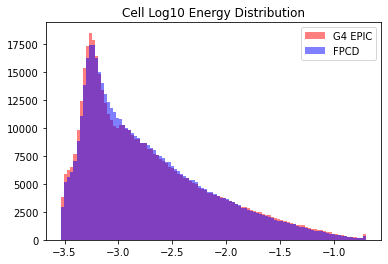

In [10]:
cellsE_bins = np.linspace(0,0.001,200)

plt.hist(np.ravel((np.log10(g4_cellsE[MASK]))),bins=100,alpha=0.5,label="G4 EPIC",color="red")
plt.hist(np.ravel(dfsn_cellsE[mask_dfsn]),bins=100,alpha=0.5,label="FPCD",color="blue")
#plt.ylim(0,0.8e7)
plt.legend()
_ = plt.title("Cell Log10 Energy Distribution")
plt.savefig("CellE.pdf")

In [11]:
print(g4_cellsE[mask]==0)

[False False False ... False False False]


In [12]:
import json, os
def LoadJson(file_name):
    import json,yaml
    JSONPATH = os.path.join(file_name)
    return yaml.safe_load(open(JSONPATH))

data_dict = LoadJson('preprocessing_200.json')

def revert_logit(x):
    alpha = 1e-6
    exp = np.exp(x)
    x = exp/(1+exp)
    return (x-alpha)/(1 - 2*alpha)

def revert(x,name='cell'):
    x = x*data_dict['std_{}'.format(name)] + data_dict['mean_{}'.format(name)]
    x = revert_logit(x)
    x = x * (np.array(data_dict['max_{}'.format(name)]) -data_dict['min_{}'.format(name)]) + data_dict['min_{}'.format(name)]
    return x

In [13]:
dfsn_cells = dfsn['cell_features'][:,:,:]

[-1300. -1500. -1200. ...     0.     0.     0.]


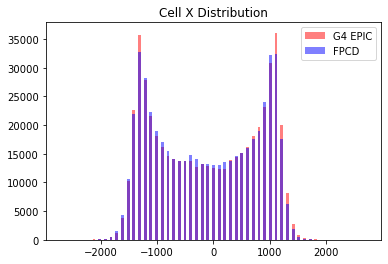

In [34]:
g4_cellsX = np.ravel(g4['hcal_cells'][:nevts,:,1])
dfsn_cellsX = np.ravel(dfsn['cell_features'][:,:,1])

dfsn_cellsZ = np.ravel(dfsn['cell_features'][:,:,3])
print(dfsn_cellsX)



#g4_cellsX = g4_cellsX[not_MASK]
g4_cellsX = g4_cellsX[MASK]
#g4_cellsX = g4_cellsX[neg_MASK]

#g4_cellsX = g4_cellsX[g4_cellsX != 0]
dfsn_cellsX = dfsn_cellsX[dfsn_cellsZ != 0]

#g4_xmask = np.abs(g4_cellsX)>= 0
#print(np.max(g4_cellsX[g4_xmask]))
#x_mask = np.abs(dfsn_cellsX)>=100

#cellsE_bins = np.linspace(0,0.001,1000)
x_bins = np.linspace(-2700,2700,108)
plt.hist(np.ravel(g4_cellsX),bins=x_bins,alpha=0.5,label="G4 EPIC",color="red",density=False)
plt.hist(np.ravel(dfsn_cellsX),bins=x_bins,alpha=0.5,label="FPCD",color="blue",density=False)
plt.legend()

_ = plt.title("Cell X Distribution")
plt.savefig("CellX.pdf")

In [15]:
print(stats.mode(dfsn_cellsX))

ModeResult(mode=array([-1300.], dtype=float32), count=array([32748]))


In [16]:
g4_test = g4_cellsX[g4_cellsX<0]
print(np.max(g4_test))

-100.0


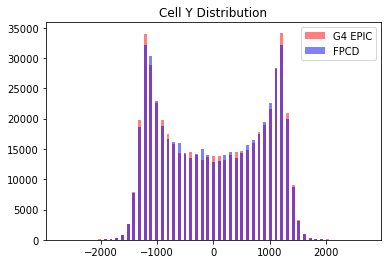

In [36]:
g4_cellsY = np.ravel(g4['hcal_cells'][:nevts,:,2])
dfsn_cellsY = np.ravel(dfsn['cell_features'][:,:,2])

g4_cellsY = g4_cellsY[MASK]
dfsn_cellsY = dfsn_cellsY[dfsn_cellsZ != 0]

y_mask = np.abs(dfsn_cellsY)>=100

#cellsE_bins = np.linspace(0,0.001,1000)
y_bins = np.linspace(-2700,2700,108)
plt.hist(np.ravel(g4_cellsY),bins=y_bins,alpha=0.5,label="G4 EPIC",color="red")
plt.hist(np.ravel(dfsn_cellsY),bins=y_bins,alpha=0.5,label="FPCD",color="blue")
plt.legend()
_ = plt.title("Cell Y Distribution")
plt.savefig("CellY.pdf")

In [18]:
print(np.min(dfsn_cellsY))

-2500.0


In [19]:
print(stats.mode(dfsn_cellsY))

ModeResult(mode=array([1200.], dtype=float32), count=array([32191]))


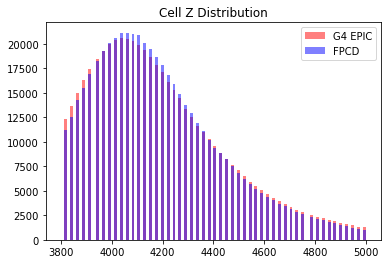

In [30]:
g4_cellsZ = np.ravel(g4['hcal_cells'][:nevts,:,3])
dfsn_cellsZ = np.ravel(dfsn['cell_features'][:,:,3])

g4_cellsZ = g4_cellsZ[g4_cellsZ != 0]
dfsn_cellsZ = dfsn_cellsZ[dfsn_cellsZ != 0]

cellsz_bins = np.linspace(3800,5000,105)
plt.hist(np.ravel(g4_cellsZ),bins=cellsz_bins,alpha=0.5,label="G4 EPIC",color="red")
plt.hist(np.ravel(dfsn_cellsZ),bins = cellsz_bins, alpha=0.5,label="FPCD",color="blue")
plt.legend()
#plt.ylim(0,0.04e7)
_ = plt.title("Cell Z Distribution")
plt.savefig("CellZ.pdf")

In [21]:
print(stats.mode(dfsn_cellsZ))
print(np.median(g4_cellsZ))

ModeResult(mode=array([4032.1], dtype=float32), count=array([21129]))
4149.1


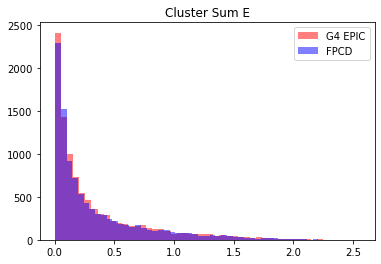

In [22]:
g4_NCells = np.ravel(g4['cluster'][:nevts,-2])
dfsn_NCells = np.ravel(dfsn['cluster_features'][:,-2])
                       
plt.hist(np.ravel(g4_NCells),alpha=0.5,bins=50,label="G4 EPIC",color="red")
plt.hist(np.ravel(dfsn_NCells),alpha=0.5,bins=50,label="FPCD",color="blue")
plt.legend()
plt.title("Cluster Sum E")
plt.savefig("ClusterSumE.pdf")

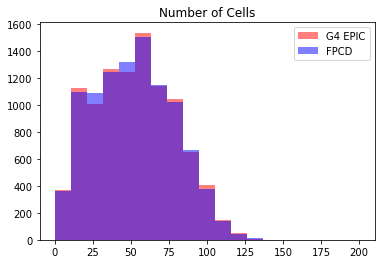

In [23]:
g4_Esum = np.ravel(g4['cluster'][:nevts,3])
dfsn_Esum = np.ravel(dfsn['cluster_features'][:,-1])
                       
plt.hist(np.ravel(g4_Esum),bins=np.linspace(0,200,20),alpha=0.5,label="G4 EPIC",color="red")
plt.hist(np.ravel(dfsn_Esum),bins=np.linspace(0,200,20),alpha=0.5,label="FPCD",color="blue")
plt.legend()
plt.title("Number of Cells")
plt.savefig("NCells.pdf")